In [6]:
from sentence_transformers import SentenceTransformer
sentences = ["This is an example sentence", "Each sentence is converted"]

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
embeddings = model.encode(sentences)

print(embeddings.shape)

(2, 384)


In [15]:
text = '''
Henry VIII (28 June 1491 – 28 January 1547) was King of England from 22 April 1509 until his death in 1547. Henry is best known for his six marriages and his efforts to have his first marriage (to Catherine of Aragon) annulled. His disagreement with Pope Clement VII about such an annulment led Henry to initiate the English Reformation, separating the Church of England from papal authority. He appointed himself Supreme Head of the Church of England and dissolved convents and monasteries, for which he was excommunicated by the pope.

Henry brought radical changes to the Constitution of England, expanding royal power and ushering in the theory of the divine right of kings in opposition to papal supremacy. He frequently used charges of treason and heresy to quell dissent, and those accused were often executed without a formal trial using bills of attainder. He achieved many of his political aims through the work of his chief ministers, some of whom were banished or executed when they fell out of his favour. Thomas Wolsey, Thomas More, Thomas Cromwell, and Thomas Cranmer all figured prominently in his administration.

Henry was an extravagant spender, using the proceeds from the dissolution of the monasteries and acts of the Reformation Parliament. He converted the money that was formerly paid to Rome into royal revenue. Despite the money from these sources, he was often on the verge of financial ruin due to personal extravagance as well as costly and largely unproductive wars, particularly with King Francis I of France, Holy Roman Emperor Charles V, King James V of Scotland and the Scottish regency under the Earl of Arran and Mary of Guise. He expanded the Royal Navy, oversaw the annexation of Wales to England with the Laws in Wales Acts 1535 and 1542 and was the first English monarch to rule as King of Ireland following the Crown of Ireland Act 1542.

Henry's contemporaries considered him an attractive, educated and accomplished king. He has been described as "one of the most charismatic rulers to sit on the English throne" and his reign described as the "most important" in English history.[1][2] He was an author and composer. As he aged, he became severely overweight and his health suffered. He is frequently characterised in his later life as a lustful, egotistical, paranoid and tyrannical monarch.[3] He was succeeded by his son Edward VI.
'''

sentences = text.split('\n')
sentences = [s for s in sentences if len(s) > 0]

sentence_embeddings = model.encode(sentences)

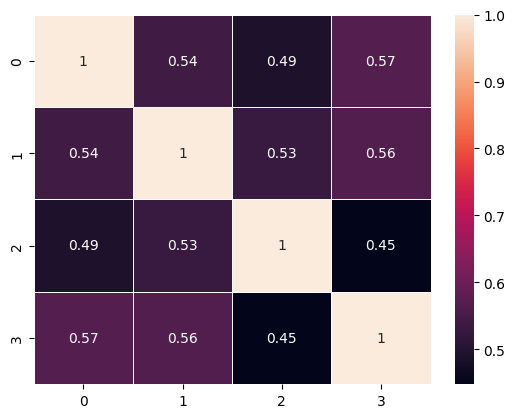

In [17]:
# compare all sentences against each other
import numpy as np

def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

mem = np.zeros((len(sentences), len(sentences)))

for i, sentence_embedding_i in enumerate(sentence_embeddings):
    for j, sentence_embedding_j in enumerate(sentence_embeddings):
        score = cosine(sentence_embedding_i, sentence_embedding_j)
        mem[i][j] = score

import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.heatmap(mem, linewidth=0.5, annot=True)
plt.show()